<a href="https://colab.research.google.com/github/Tilak-Shenoy/IE517/blob/main/IEE517_SP23_HW6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [131]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
import numpy as np
import math
from sklearn.model_selection import StratifiedKFold, cross_val_score

In [52]:
# Importing dataset
df = pd.read_excel('https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls')
df.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  30001 non-null  object
 1   X1          30001 non-null  object
 2   X2          30001 non-null  object
 3   X3          30001 non-null  object
 4   X4          30001 non-null  object
 5   X5          30001 non-null  object
 6   X6          30001 non-null  object
 7   X7          30001 non-null  object
 8   X8          30001 non-null  object
 9   X9          30001 non-null  object
 10  X10         30001 non-null  object
 11  X11         30001 non-null  object
 12  X12         30001 non-null  object
 13  X13         30001 non-null  object
 14  X14         30001 non-null  object
 15  X15         30001 non-null  object
 16  X16         30001 non-null  object
 17  X17         30001 non-null  object
 18  X18         30001 non-null  object
 19  X19         30001 non-null  object
 20  X20   

In [54]:
# Drop id
df = df.iloc[:, 1:]

In [55]:
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


In [56]:
# Remove index and set proper column names
df = df.reset_index(drop=True)
df.columns = df.iloc[0]
df = df[1:]

In [57]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


Exploring the categorical data

In [40]:
df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [41]:
df['SEX'].value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

In [42]:
df['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In [44]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1:]

In [58]:
# Since type(y) is a dataframe of objects, we need to convert it into dataframe of ints
y=y.astype('int')

In [51]:
print(X.shape)
print(y.shape)
print(type(y))

(30000, 23)
(30000, 1)
<class 'pandas.core.frame.DataFrame'>


# Part 1: Random Test Train Split

In [65]:
# Running DecisionTree for determining max_depth
dt = DecisionTreeClassifier(criterion = 'gini', max_depth=10, random_state = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=10, stratify=y)
train = dt.fit(X_train, y_train)

In [67]:
y_pred_train = dt.predict(X_train)

In [68]:
accuracy_score(y_train, y_pred_train)

0.8465185185185186

In [69]:
y_pred_test = dt.predict(X_test)

In [70]:
accuracy_score(y_test, y_pred_test)

0.804

In [98]:
# Running DecisionTree for determining max_depth
dt = DecisionTreeClassifier(criterion = 'gini', max_depth=4, random_state = 1)
train = dt.fit(X_train, y_train)

y_pred_train = dt.predict(X_train)
accuracy_score(y_train, y_pred_train)

0.8237777777777778

In [99]:
y_pred_test = dt.predict(X_test)
accuracy_score(y_test, y_pred_test)

0.8206666666666667

In [96]:
# Running DecisionTree for determining max_depth
dt = DecisionTreeClassifier(criterion = 'gini', max_depth=25, random_state = 1)
train = dt.fit(X_train, y_train)

y_pred_train = dt.predict(X_train)
accuracy_score(y_train, y_pred_train)

0.9698888888888889

In [97]:
y_pred_test = dt.predict(X_test)
accuracy_score(y_test, y_pred_test)

0.7393333333333333

In [94]:
# Running DecisionTree for determining max_depth
dt = DecisionTreeClassifier(criterion = 'gini', max_depth=30, random_state = 1)
train = dt.fit(X_train, y_train)

y_pred_train = dt.predict(X_train)
accuracy_score(y_train, y_pred_train)

0.9917037037037038

In [95]:
y_pred_test = dt.predict(X_test)
accuracy_score(y_test, y_pred_test)

0.7276666666666667

In [92]:
# Running DecisionTree for determining max_depth
dt = DecisionTreeClassifier(criterion = 'gini', max_depth=50, random_state = 1)
train = dt.fit(X_train, y_train)

y_pred_train = dt.predict(X_train)
accuracy_score(y_train, y_pred_train)

0.9993703703703704

In [93]:
y_pred_test = dt.predict(X_test)
accuracy_score(y_test, y_pred_test)

0.721

Looking at the various max_depth values, we see that training accuracy increases but testing accuracy does not. Hence we choose max_depth=4 where both training and testing accuracy are at par with each other

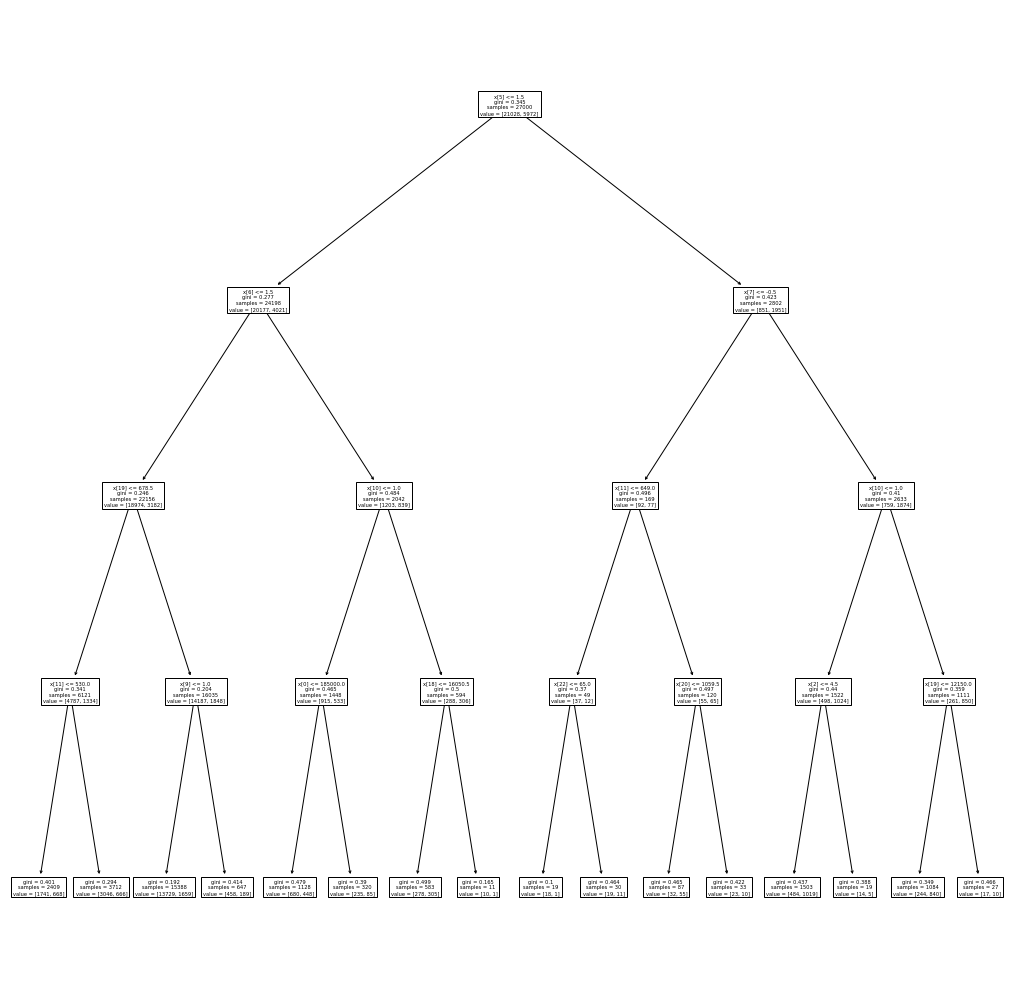

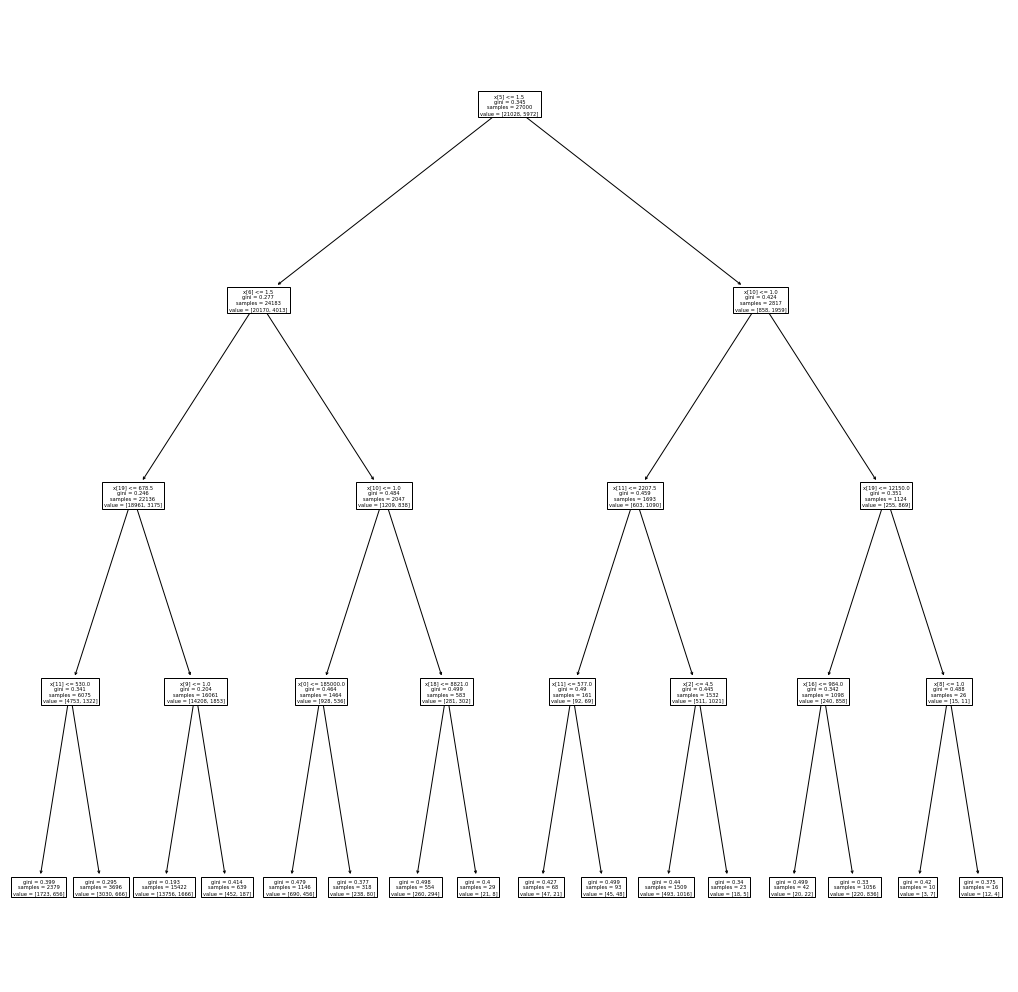

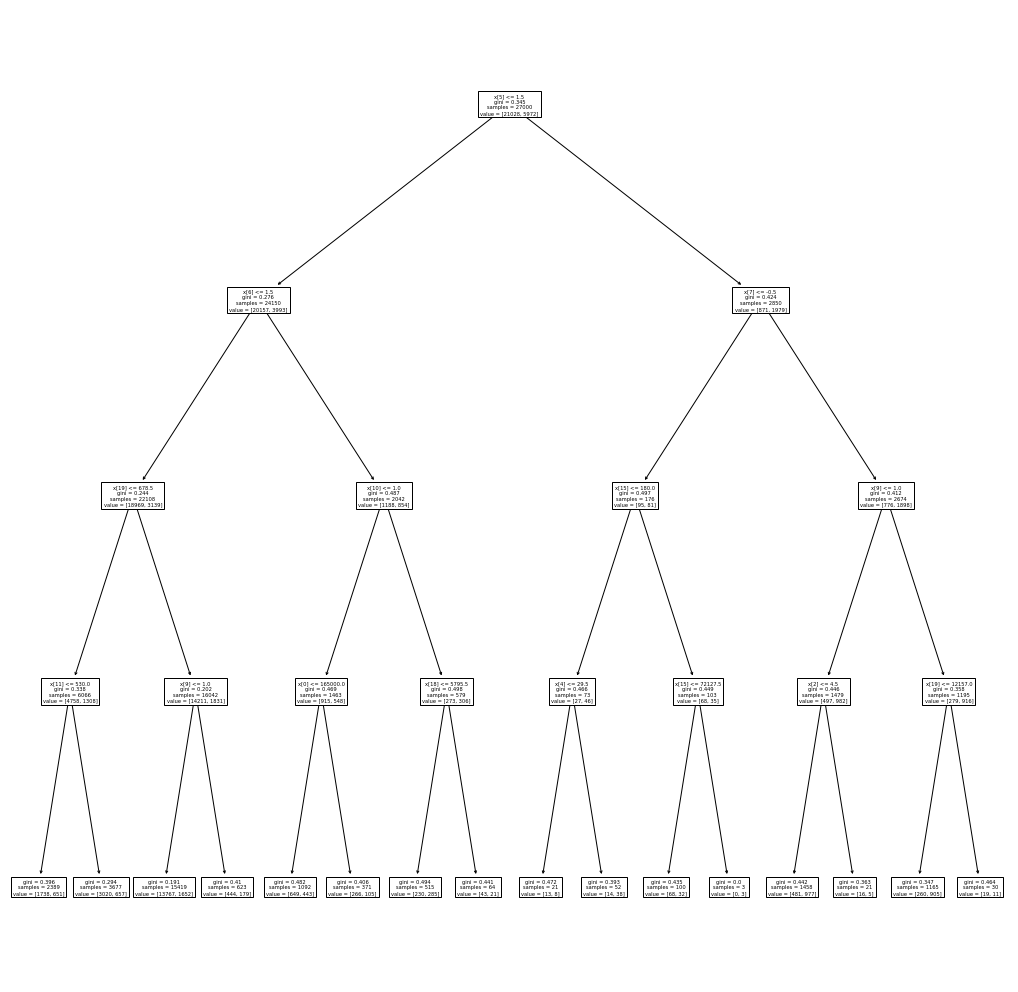

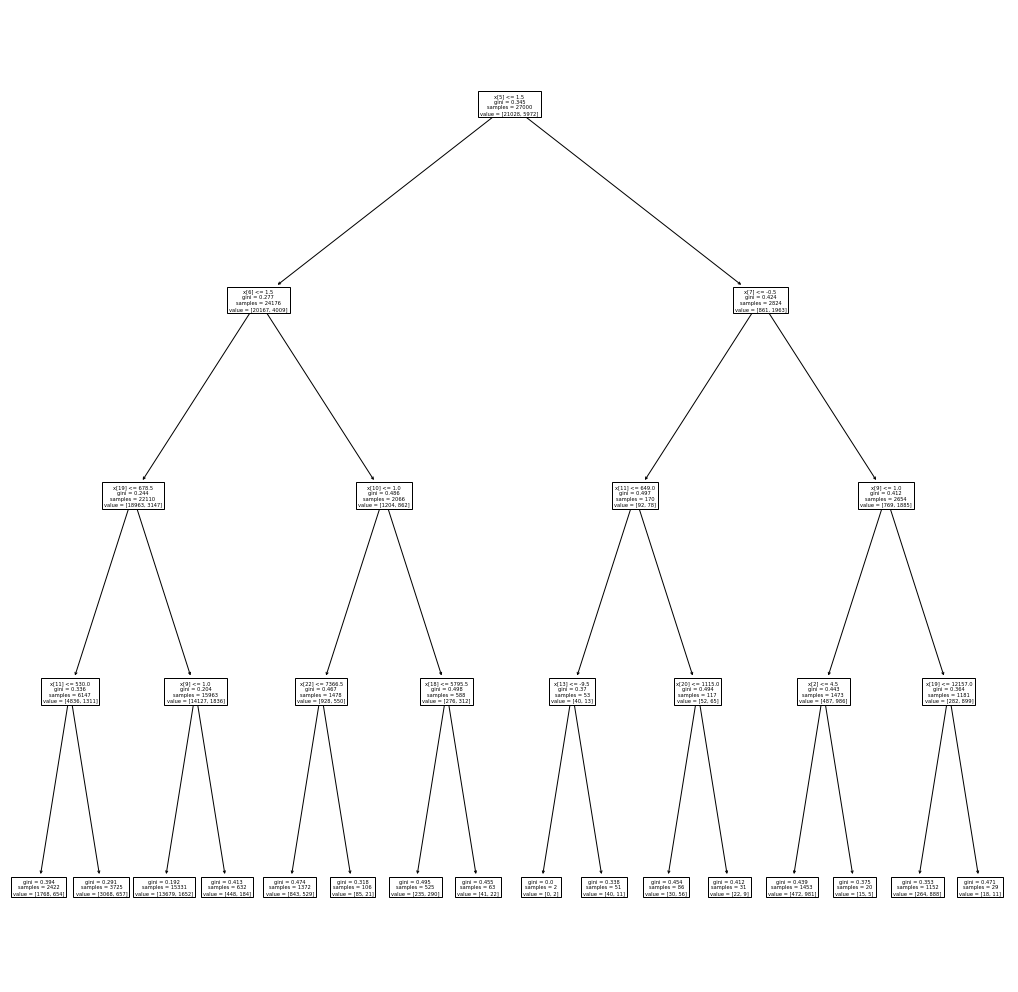

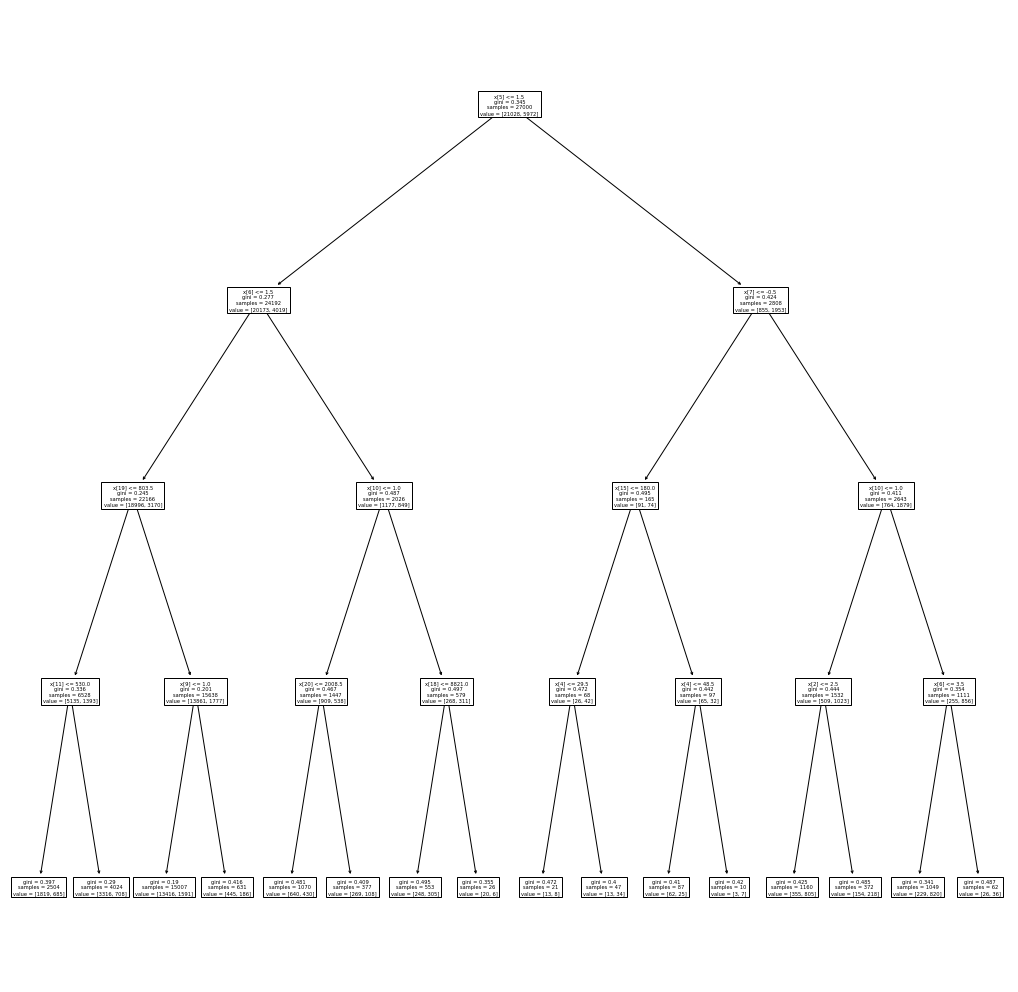

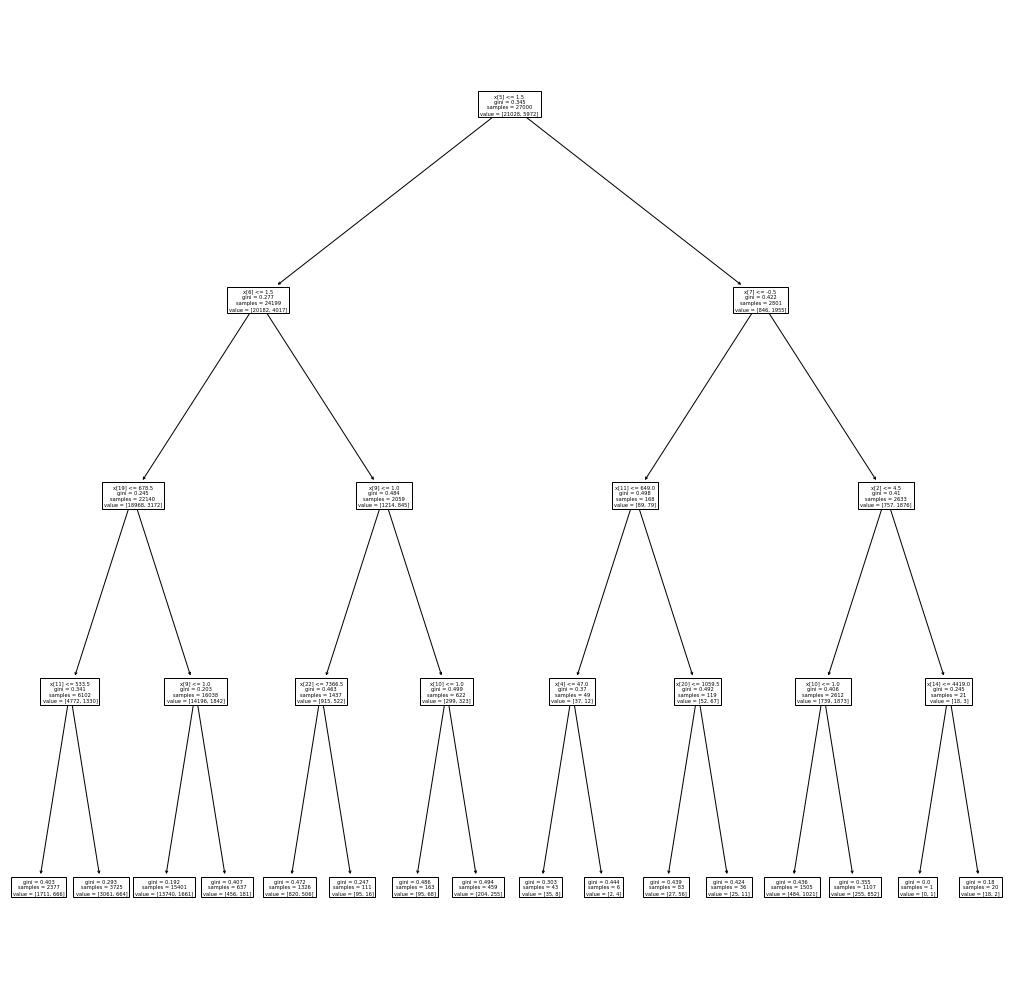

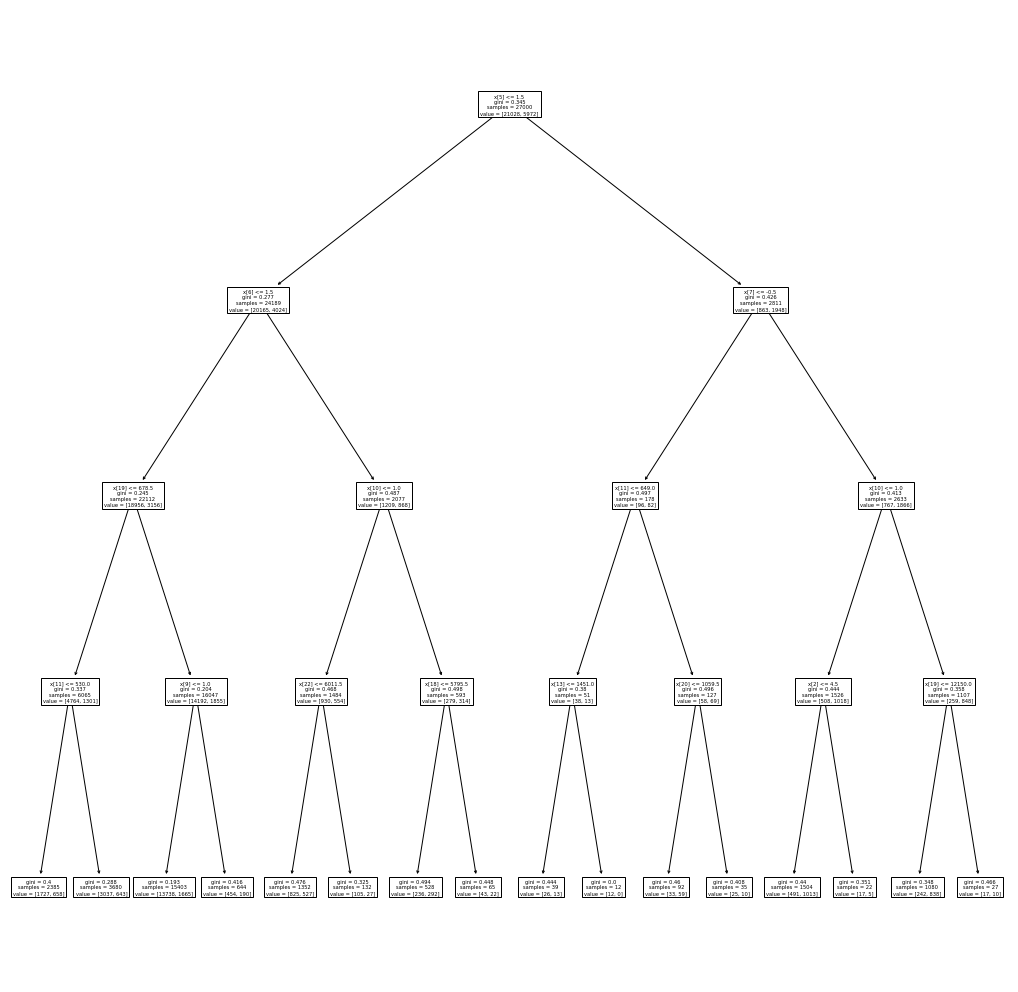

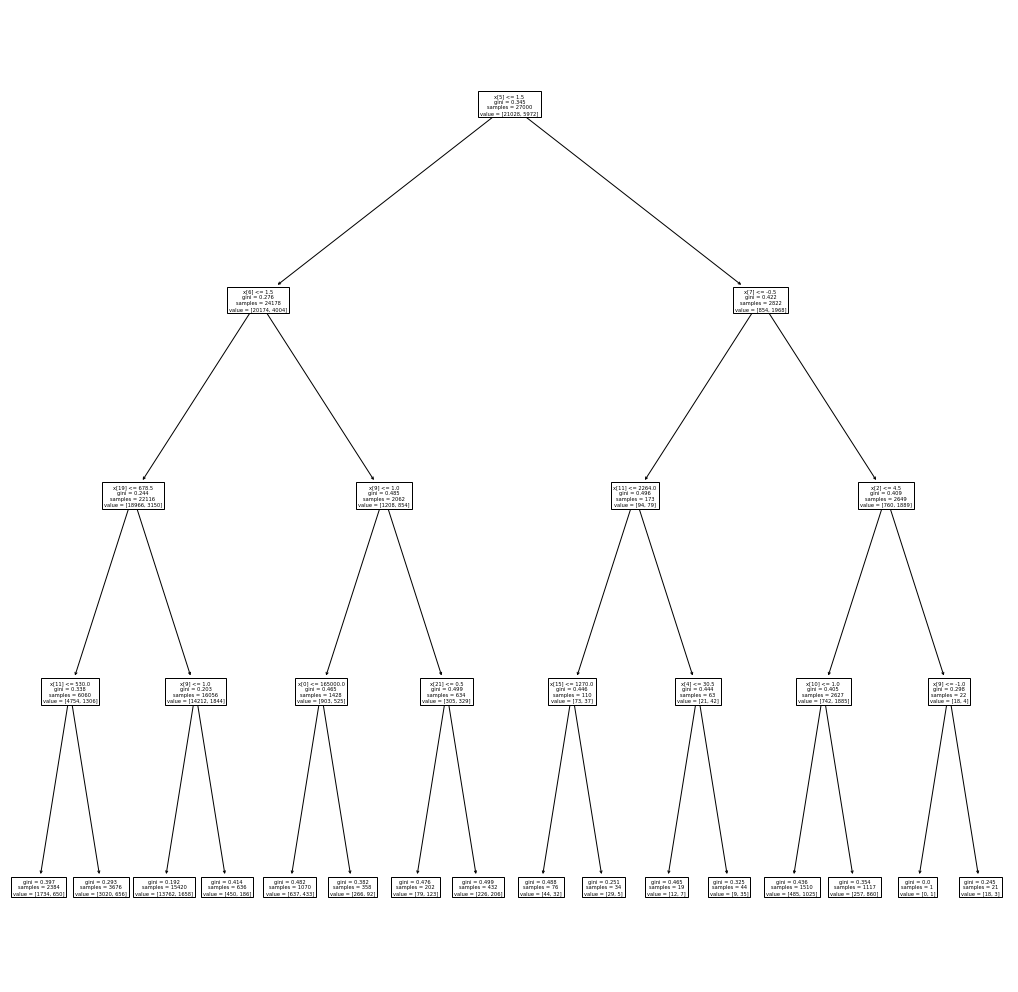

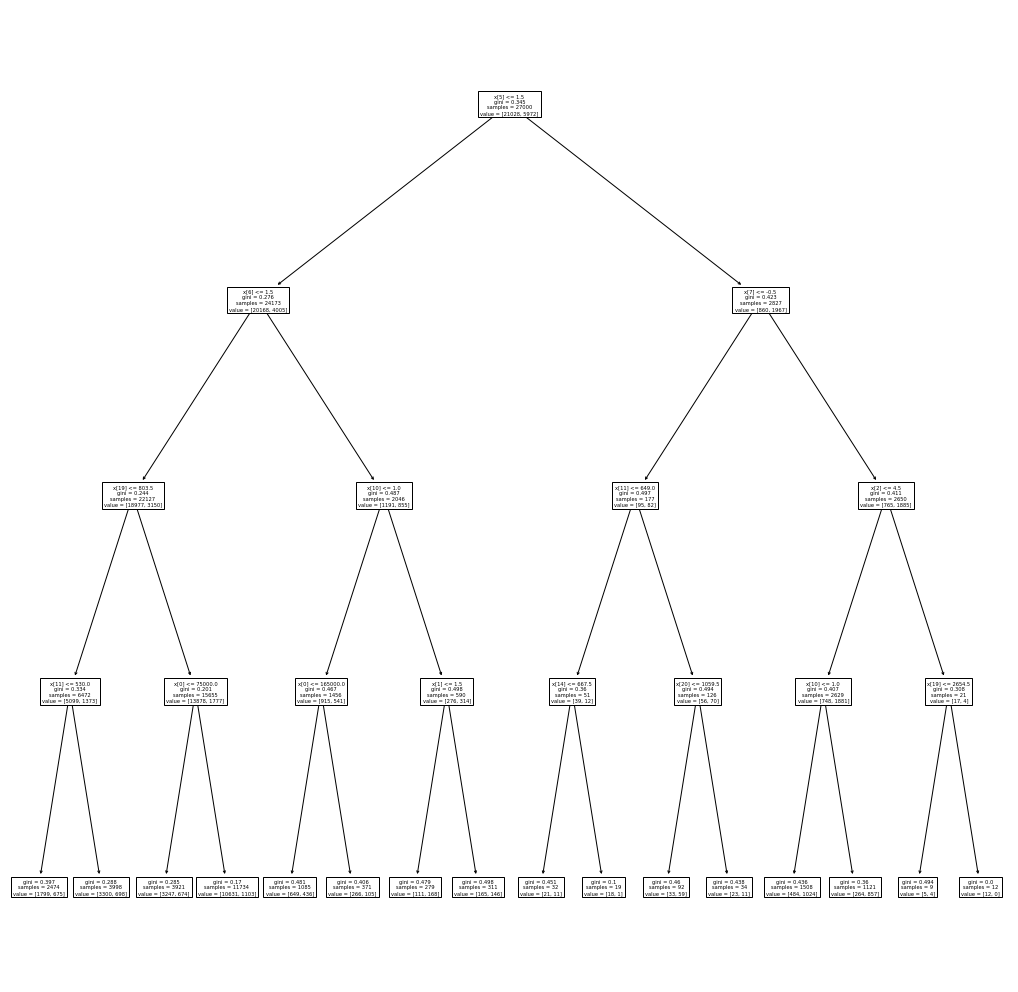

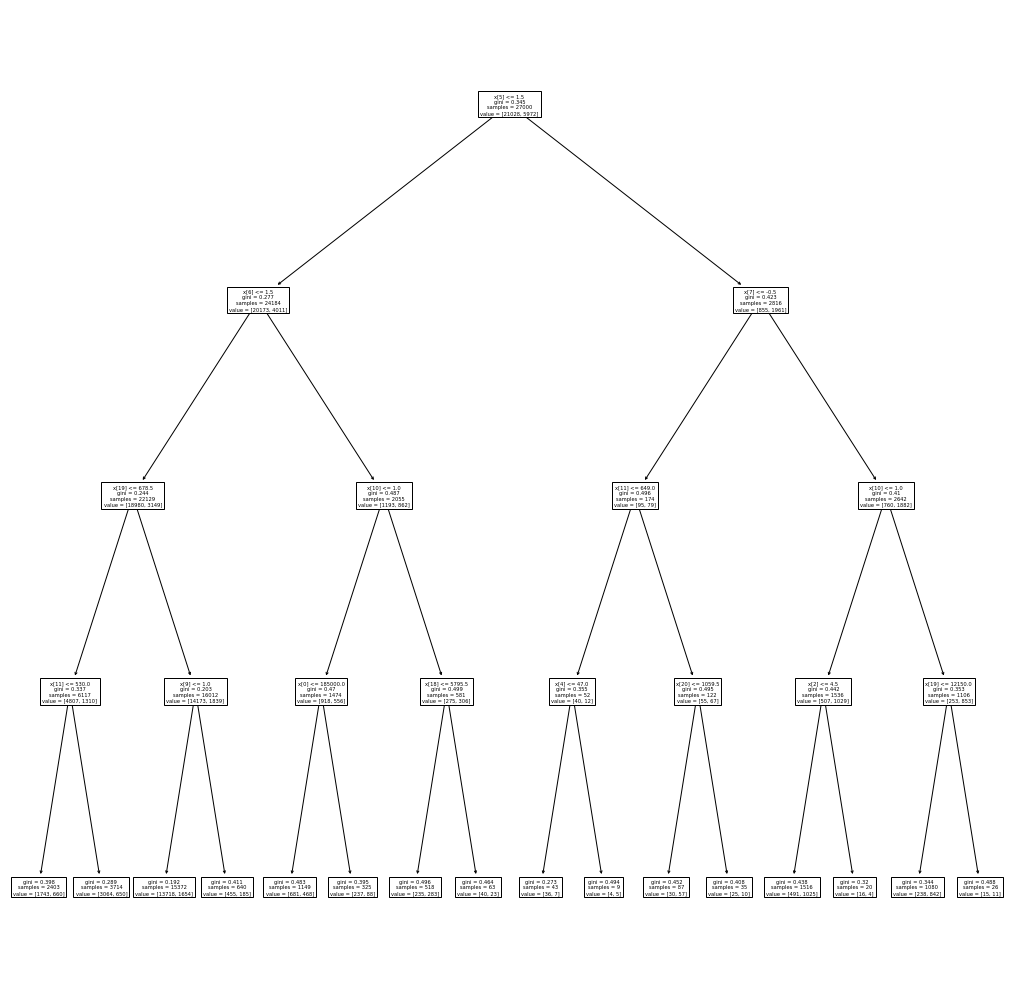

In [104]:
# Running Decision tree with various values of random state in the test_train_split
dt = DecisionTreeClassifier(criterion = 'gini', max_depth=4, random_state = 1)
train_accuracies = []
test_accuracies = []
for i in range(10):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=i+1, stratify=y)
  train = dt.fit(X_train, y_train)
  # Visualizing the decision tree
  plt.figure(figsize=(18,18))
  plot_tree(train)
  y_pred_train = dt.predict(X_train)
  y_pred_test = dt.predict(X_test)

  train_accuracies.append(accuracy_score(y_train, y_pred_train))
  test_accuracies.append(accuracy_score(y_test, y_pred_test))

In [107]:
print('Training Accuracies: ')
print(train_accuracies)
print('Test Accuracies: ')
print(test_accuracies)

Training Accuracies: 
[0.8225555555555556, 0.8225925925925925, 0.8241111111111111, 0.8238518518518518, 0.8231481481481482, 0.8238888888888889, 0.8232592592592592, 0.8237777777777778, 0.8238518518518518, 0.8237777777777778]
Test Accuracies: 
[0.8283333333333334, 0.824, 0.8173333333333334, 0.8203333333333334, 0.818, 0.819, 0.8253333333333334, 0.8166666666666667, 0.8173333333333334, 0.8206666666666667]


In [183]:
accuracies= pd.DataFrame(np.column_stack((np.arange(1,11),train_accuracies,test_accuracies)),columns=['Random State','Training Accuracy','Testing Accuracy'])
accuracies['Random State'] = accuracies['Random State'].astype(int)
accuracies

,Random State,Training Accuracy,Testing Accuracy
0,1,0.822556,0.828333
1,2,0.822593,0.824000
2,3,0.824111,0.817333
3,4,0.823852,0.820333
4,5,0.823148,0.818000
5,6,0.823889,0.819000
6,7,0.823259,0.825333
7,8,0.823778,0.816667
8,9,0.823852,0.817333
9,10,0.823778,0.820667


In [121]:
# Calculating mean
train_mean = sum(train_accuracies)/10
test_mean = sum(test_accuracies)/10
print('Mean of training accuracies: ', train_mean)
print('Mean of testing accuracies', test_mean)

Mean of training accuracies:  0.8234814814814815
Mean of testing accuracies 0.8206999999999999


In [129]:
# Calculating standard deviation
sum = 0
for acc in train_accuracies:
  sum += (acc-train_mean) ** 2
train_std = math.sqrt(sum/10)


sum = 0
for acc in test_accuracies:
  sum += (acc-test_mean) ** 2
test_std = math.sqrt(sum/10)

print('Standard deviation of training accuracies', train_std)
print('Standard deviation of testing accuracies', test_std)

Standard deviation of training accuracies 0.0005310651356721515
Standard deviation of testing accuracies 0.0037400237670070827


# Part 2: Cross-validation

In [162]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1, stratify=y)

In [163]:
# Creating a k-fold with 10 splits
cv = StratifiedKFold(n_splits=10, random_state=1, shuffle=True).split(X_train,y_train)

In [164]:
cv_scores = cross_val_score(dt, X_train,y_train, cv=cv)

In [171]:
print('Cross validated scores: ', cv_scores)

Cross validated scores:  [0.82592593 0.81851852 0.81777778 0.82       0.81333333 0.82518519
 0.81925926 0.82666667 0.81925926 0.81666667]


In [182]:
cv_df = pd.DataFrame(np.column_stack((np.arange(1,11).astype(int), cv_scores)), columns=['Folds', 'Accuracy'])
cv_df['Folds']=cv_df['Folds'].astype(int)
cv_df

,Folds,Accuracy
0,1,0.825926
1,2,0.818519
2,3,0.817778
3,4,0.820000
4,5,0.813333
5,6,0.825185
6,7,0.819259
7,8,0.826667
8,9,0.819259
9,10,0.816667


In [166]:
type(cv_scores)

numpy.ndarray

In [167]:
cv_mean = cv_scores.sum()/10
print('CV mean: ', cv_mean)

CV mean:  0.8202592592592592


In [168]:
sum = 0
for acc in cv_scores:
  sum+= (acc-cv_mean) ** 2
cv_std = math.sqrt(sum/10)
print('CV Std: ', cv_std)

CV Std:  0.004117779043659395


In [169]:
# Fit the model on training data
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4, random_state=1)

In [170]:
holdout_score = dt.score(X_test,y_test)

print('Holdout score: ', holdout_score)

Holdout score:  0.8283333333333334


In [161]:
print("My name is Tilak Shenoy")
print("My NetID is: tshenoy2")
print("I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.")

My name is Tilak Shenoy
My NetID is: tshenoy2
I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.
